### Modeling

In [180]:
df_model = pd.read_csv("processed_df.csv")
data = df_model[['price',
           'room_type',
           'accommodates',
           'bathrooms',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'instant_bookable',
           'cancellation_policy',
           'amenities']]

df_model['amenities'].dropna(inplace = True)

In [181]:
# cancellation policy and instant bookable factors are little bit more complicated.
# we use pandas get_dummies function to convert the categorical variable into indicator variables

cancel_policy = pd.get_dummies(data.cancellation_policy).astype(int)
instant_booking = pd.get_dummies(data.instant_bookable, prefix = 'instant_booking').astype(int)
room_type = pd.get_dummies(data.room_type).astype(int)

# ib has 2 columns, so we can just drop one of them.
instant_booking = instant_booking.drop('instant_booking_f', axis = 1)

In [182]:
# we drop the original columns and replace them with indicator columns
data = data.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
data = pd.concat((data, cancel_policy, instant_booking, room_type), axis = 1)

In [183]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in data.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

data.amenities = amenities_list

In [184]:
data

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,0,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_t,Entire home/apt,Private room
0,59.0,2,1.5,1.0,2.0,98.0,63,0,0,0,1,0,0,1,0,1
1,80.0,2,1.0,1.0,1.0,88.0,22,0,0,0,1,0,0,0,0,1
2,125.0,3,1.0,1.0,1.0,100.0,15,0,0,0,1,0,0,0,1,0
3,150.0,2,1.0,1.0,1.0,99.0,20,0,0,0,1,0,0,1,0,1
4,75.0,2,1.0,1.0,1.0,97.0,15,0,0,1,0,0,0,0,0,1
5,55.0,1,1.0,1.0,1.0,95.0,17,0,0,1,0,0,0,0,0,1
6,219.0,4,1.0,3.0,3.0,95.0,19,0,0,1,0,0,0,0,1,0
7,145.0,2,1.0,1.0,1.0,99.0,13,0,0,0,1,0,0,0,1,0
8,159.0,2,1.0,1.0,1.0,98.0,17,0,0,0,1,0,0,1,0,1
9,210.0,4,1.0,2.0,4.0,97.0,8,0,0,1,0,0,0,0,1,0


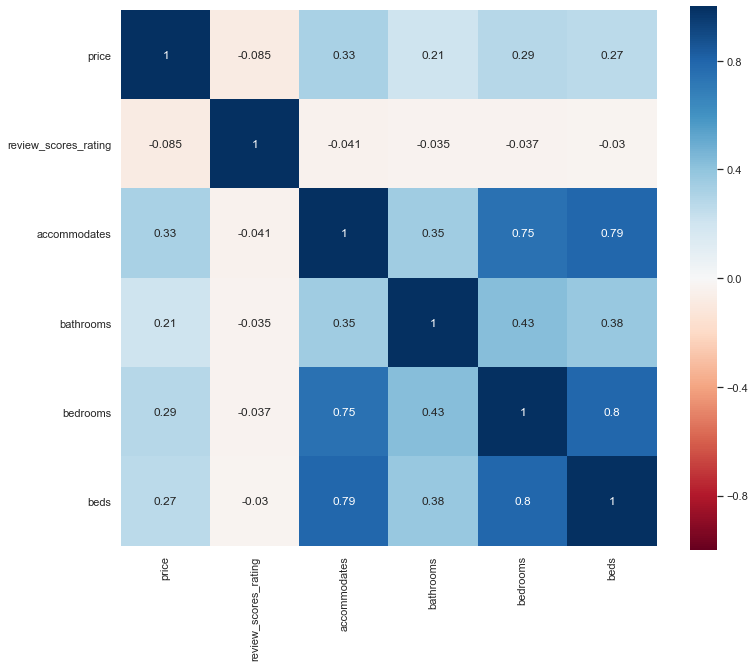

In [185]:
#Plotting a correlation heatmap
plt.figure(figsize = (12,10))
sns.heatmap(data[['price', 'review_scores_rating','accommodates', 'bathrooms', 'bedrooms', 'beds']].corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [187]:
X = data[['review_scores_rating','accommodates', 'bathrooms', 'bedrooms', 'beds']]

In [188]:
Y = data.price

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y.values,test_size = .3,random_state=1)

In [190]:
lm = LinearRegression()

In [191]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
y_pred = lm.predict(X_test)

In [194]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [195]:
mean_absolute_error(y_test,y_pred)

59.249296855557

In [196]:
y_test

array([153., 298.,  99., ...,  79., 279.,  50.])

In [197]:
y_pred

array([178.79558474, 162.04111743, 194.08290837, ..., 137.67923382,
       241.51157165, 173.86136637])

In [198]:
np.sqrt(mean_squared_error(y_test,y_pred))

172.10641431727208

In [199]:
lm.coef_

array([-0.30276701, 34.30261817, 34.49263814, 13.91494676, -6.30659524])

In [200]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [201]:
r2_score(y_test,y_pred)

0.10305023847599637

In [202]:
data.head(2)

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,0,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_t,Entire home/apt,Private room
0,59.0,2,1.5,1.0,2.0,98.0,63,0,0,0,1,0,0,1,0,1
1,80.0,2,1.0,1.0,1.0,88.0,22,0,0,0,1,0,0,0,0,1


In [203]:
df1 = df[['price',
           'room_type',
           'neighbourhood_cleansed',
           'accommodates',
           'bathrooms',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'instant_bookable',
           'cancellation_policy',
           'amenities']]

In [204]:
df1.head(2)

,price,room_type,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,review_scores_rating,instant_bookable,cancellation_policy,amenities
0,59.0,Private room,Oostelijk Havengebied - Indische Buurt,2,1.5,1.0,2.0,98.0,t,strict_14_with_grace_period,"{Internet,Wifi,""Paid parking off premises"",""Bu..."
1,80.0,Private room,Centrum-Oost,2,1.0,1.0,1.0,88.0,f,strict_14_with_grace_period,"{TV,Internet,Wifi,""Paid parking off premises"",..."


In [205]:
# Because one hot encoding only takes numerical value, first need to convert the label into numeric and then use 
# one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [206]:
df1['room_type'] = le.fit_transform(df1['room_type'])

C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [207]:
df1['neighbourhood_cleansed'] = le.fit_transform(df1['neighbourhood_cleansed'])

C:\Users\aakas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
df1.head(2)

,price,room_type,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,review_scores_rating,instant_bookable,cancellation_policy,amenities
0,59.0,1,14,2,1.5,1.0,2.0,98.0,t,strict_14_with_grace_period,"{Internet,Wifi,""Paid parking off premises"",""Bu..."
1,80.0,1,4,2,1.0,1.0,1.0,88.0,f,strict_14_with_grace_period,"{TV,Internet,Wifi,""Paid parking off premises"",..."


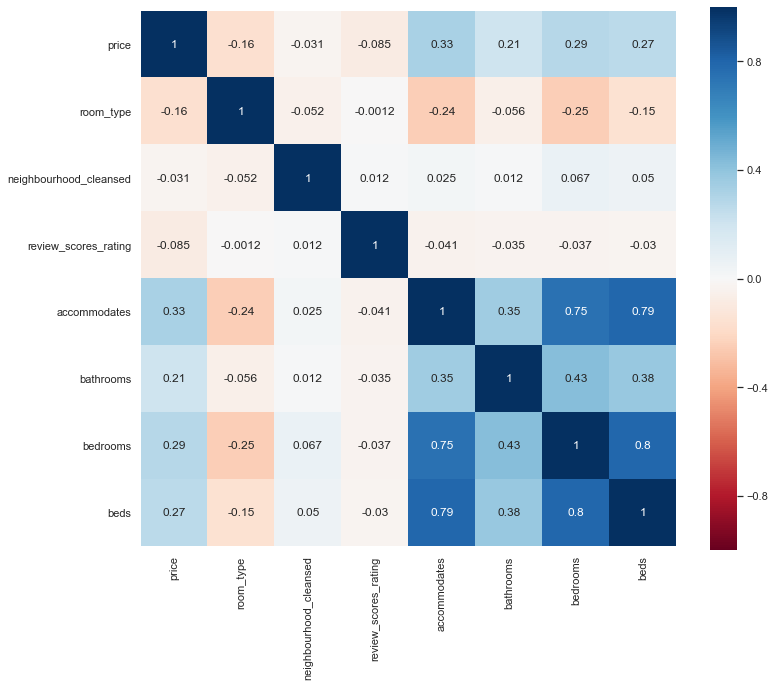

In [209]:
#Plotting a correlation heatmap
plt.figure(figsize = (12,10))
sns.heatmap(df1[['price', 'room_type', 'neighbourhood_cleansed', 'review_scores_rating','accommodates', 'bathrooms', 'bedrooms', 'beds']].corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [210]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(categorical_features=[0,1])

In [211]:
X1 = df1[['room_type', 'neighbourhood_cleansed', 'review_scores_rating','accommodates', 'bathrooms', 'bedrooms', 'beds']]

In [212]:
X1.head(2)

,room_type,neighbourhood_cleansed,review_scores_rating,accommodates,bathrooms,bedrooms,beds
0,1,14,98.0,2,1.5,1.0,2.0
1,1,4,88.0,2,1.0,1.0,1.0


In [213]:
X1 = ohc.fit_transform(X1).toarray()

In [214]:
X1

array([[0. , 1. , 0. , ..., 1.5, 1. , 2. ],
       [0. , 1. , 0. , ..., 1. , 1. , 1. ],
       [1. , 0. , 0. , ..., 1. , 1. , 1. ],
       ...,
       [1. , 0. , 0. , ..., 1. , 2. , 2. ],
       [0. , 1. , 0. , ..., 1. , 1. , 1. ],
       [1. , 0. , 0. , ..., 1. , 1. , 2. ]])

In [215]:
Y1 = df1.price

In [216]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1.values,test_size=.3,random_state=3)

In [217]:
lm1 = LinearRegression()

In [218]:
lm1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
y1_pred = lm1.predict(X1_test)

In [220]:
r2_score(y1_test,y1_pred)

0.13714154335555206

In [221]:
mean_absolute_error(y1_test,y1_pred)

52.90926642426515

In [222]:
np.sqrt(mean_squared_error(y1_test,y1_pred))

158.78994349143255